# 【問題1】仮定関数

以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。  

$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$$  

$x$: 特徴量ベクトル  
$\theta$: パラメータベクトル  
$n$: 特徴量の数  
$x_j$: j番目の特徴量  
$\theta_j$:j番目のパラメータ（重み）  
特徴量の数$n$は任意の値に対応できる実装にしてください。  
なお、ベクトル形式で表すと以下のようになります。  

$$
h_\theta(x) = \theta^T \cdot x.
$$

以下のメソッドをScratchLinearRegressionクラス内に実装
```python
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    return np.dot(X, self.coef_)
```

# 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、  
fitメソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

$\alpha$: 学習率  
$i$ : サンプルのインデックス  
$j$: 特徴量のインデックス

以下のメソッドをScratchLinearRegressionクラス内に実装
```python
def _gradient_descent(self, X, errors):
    """
    最急降下法により重みとバイアスの更新を行う
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    errors : 次の形のndarray, shape (n_samples,)
      目的変数から予測値を引いたもの
    """    
    self.coef_ -= self.lr * np.dot(errors.T, X) / X.shape[0]        
```

# 【問題3】推定

推定する仕組みを実装してください。  
ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。  
仮定関数 $h_\theta(x)$ の出力が推定結果です。

以下のメソッドをScratchLinearRegressionクラス内に実装
```python
def predict(self, X):
    """
    線形回帰を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    return self._linear_hypothesis(X)
```

# 【問題4】平均二乗誤差

線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。  
平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。  
雛形を用意してあります。  
平均二乗誤差は以下の数式で表されます。
$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$
$m$ : 入力されるデータの数  
$h_\theta()$ : 仮定関数  
$x^{(i)}$ : i番目のサンプルの特徴量ベクトル  
$y^{(i)}$ : i番目のサンプルの正解値  

In [1]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = ((y_pred - y)**2).sum() / y.shape[0]
    return mse

# 【問題5】目的関数

以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。  
そして、これをself.loss, self.val_lossに記録するようにしてください。  
目的関数（損失関数） $J(\theta)$ は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$
$m$ : 入力されるデータの数  
$h_\theta()$ : 仮定関数  
$x^{(i)}$ : i番目のサンプルの特徴量ベクトル  
$y^{(i)}$ : i番目のサンプルの正解値

以下のコードをScratchLinearRegressionクラスのfitメソッド内に実装
```python
self.loss[i] = MSE(y_train_pred, y_train) / 2
self.val_loss[i] = MSE(y_test_pred, y_test) / 2
```

# 【問題6】学習と推定

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。  
scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [3]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, random_state=1, no_bias=False, verbose=True):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.random_state = random_state
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        return np.dot(X, self.coef_)
        
    def _gradient_descent(self, X, errors):
        """
        最急降下法により重みとバイアスの更新を行う
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        errors : 次の形のndarray, shape (n_samples,)
          目的変数から予測値を引いたもの
        """    
        self.coef_ -= self.lr * np.dot(errors.T, X) / X.shape[0]        
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
                
        if self.no_bias == False:
            X = np.insert(X,0,1,axis=1)
            if X_val is not None:
                X_val = np.insert(X_val,0,1,axis=1)
                
        # 重みの生成
        rgen = np.random.RandomState(self.random_state)
        self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=(X.shape[1]))
        
        for i in range(self.iter):
            # 仮定関数を求める
            output = self._linear_hypothesis(X)
            # 誤差を求める
            errors = output - y
            # 最急降下法による重み、バイアスの更新
            self._gradient_descent(X, errors)
            # 目的関数を求めて、self.lossに格納
            self.loss[i] = MSE(output, y) / 2
            
            # 検証データについて、目的関数を求める
            if (X_val is not None) and (y_val is not None):
                output_val = self._linear_hypothesis(X_val)
                self.val_loss[i] = MSE(output_val, y_val) / 2
                    
            if self.verbose==True:
                print("num_iter : {}, loss = {}".format(i, self.loss[i]))
                pass
                
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias == False:
            X = np.insert(X,0,1,axis=1)
        return self._linear_hypothesis(X)

In [4]:
# データ読み込み
df = pd.read_csv('train.csv')
X1 = df.drop('SalePrice', axis=1)
X1 = X1[['GrLivArea', 'YearBuilt']].values
y1 = df['SalePrice'].values

In [5]:
# 標準化
X1 = (X1 - X1.mean())/ X1.std()
# 対数変換
y1 = np.log(y1)

In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.8)

In [7]:
lr1 = ScratchLinearRegression(num_iter=1000, lr=0.01, random_state=42, no_bias=False, verbose=True)
lr1.fit(X_train1, y_train1, X_test1, y_test1)

num_iter : 0, loss = 72.30585734169878
num_iter : 1, loss = 70.16113474910307
num_iter : 2, loss = 68.09050223442897
num_iter : 3, loss = 66.0911323258728
num_iter : 4, loss = 64.16031136575234
num_iter : 5, loss = 62.29543481116348
num_iter : 6, loss = 60.49400273090468
num_iter : 7, loss = 58.753615490429894
num_iter : 8, loss = 57.07196961693875
num_iter : 9, loss = 55.446853837044415
num_iter : 10, loss = 53.87614527977682
num_iter : 11, loss = 52.3578058379846
num_iter : 12, loss = 50.889878681490025
num_iter : 13, loss = 49.4704849156311
num_iter : 14, loss = 48.09782037909263
num_iter : 15, loss = 46.770152575184525
num_iter : 16, loss = 45.4858177309711
num_iter : 17, loss = 44.243217978890776
num_iter : 18, loss = 43.040818655730604
num_iter : 19, loss = 41.87714571403625
num_iter : 20, loss = 40.75078324124473
num_iter : 21, loss = 39.66037108202539
num_iter : 22, loss = 38.60460255950436
num_iter : 23, loss = 37.58222229122945
num_iter : 24, loss = 36.59202409590691
num_iter

In [8]:
y_pred1_log = lr1.predict(X_test1)
y_pred1 = np.exp(y_pred1_log)
print(y_pred1)

[210559.86649422 248639.43041109 118173.44345919 157378.55538966
 208233.17083617  73699.59789074 260423.39238878 216663.45493251
 102390.51415391 104176.72155135  83252.91985865 250115.2205128
 271963.19802224  93385.72551275  77147.76543218 131294.70548297
 106989.47551592 131012.76358512 109828.02542215 263504.92474829
 186808.10519115 253496.89385857 157694.50241294 149771.82750138
  77500.75108501 250913.88098224 116876.04578238 288906.13825578
 110792.5567063   72137.34867131 140539.60955143 270227.90338157
 308443.1350917  228770.161241   177221.49762943 293215.87073398
 106296.69277156 164753.81152984  70637.21527387  91523.32941207
 196386.09068718 246993.28147546 421394.88531676 146770.68617825
 190651.07645506 156468.88499719 107227.63488285  75233.86774198
  94028.65390889 160608.39121447  92695.83321265 250181.66011964
  87553.10864247  96016.24283219 118785.88336118 146437.72631056
 131177.40911723 135306.37556999 229068.76704138 290887.91368044
 220044.16822167 110733.71

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
# 自作関数でMSEを計算
mse1 = MSE(y_test1, y_pred1)
print('mse1 = {}'.format(mse1))

# scikit-learnライブラリによりMSEを計算
mse2 = mean_squared_error(y_test1, y_pred1)
print('mse2 = {}'.format(mse2))

mse1 = 38679524556.663124
mse2 = 38679524556.663124


In [11]:
from sklearn.linear_model import SGDRegressor
lr2 = SGDRegressor(eta0=0.01, max_iter=1000, random_state=42)
lr2.fit(X_train1, y_train1)
y_pred2_log = lr2.predict(X_test1)
y_pred2 = np.exp(y_pred2_log)
print(y_pred2)

[210599.51095729 248519.69001308 118817.45400035 158101.10793161
 208418.47432237  74393.88228346 260199.32647492 216663.54113432
 103056.64359112 104902.72107463  83921.13521099 250001.36891919
 271659.3600313   94303.79905708  77841.0192821  131952.31212059
 107960.84817722 131648.91437817 110488.32804274 263320.68766419
 187231.39901976 253488.96982891 158185.78364506 150323.47080071
  78237.82177669 250985.95087464 117690.84714496 288735.95939678
 111502.34475255  72832.09965781 141007.69259803 269948.69639933
 308100.35664158 228724.40560498 177589.99904159 292832.66990794
 106957.91188607 165268.97001464  71332.25249111  92321.86095025
 196753.08648314 246908.72506261 420084.86441223 147261.48493399
 190878.89314315 157106.50758789 107907.75318631  75927.06539611
  94734.49445851 161086.22735472  93499.02303283 250121.58871444
  88335.33700499  96790.3485085  119423.88044381 147111.91424967
 131849.2453971  135898.73154511 228996.77404001 290502.87848728
 220135.46754126 111395.1

In [12]:
# 自作関数でMSEを計算
mse3 = MSE(y_test1, y_pred2)
print('mse3 = {}'.format(mse3))

# scikit-learnライブラリによりMSEを計算
mse4 = mean_squared_error(y_test1, y_pred2)
print('mse4 = {}'.format(mse4))

mse3 = 38722285402.45527
mse4 = 38722285402.45527


# 【問題7】学習曲線のプロット

学習曲線を表示する関数を作成し、実行してください。  
グラフを見て損失が適切に下がっているかどうか確認してください。  
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

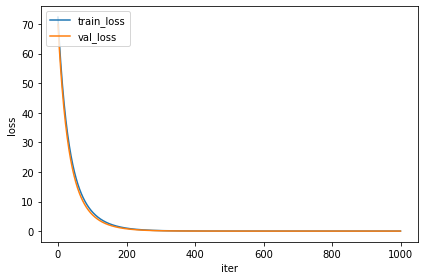

In [13]:
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(lr1.loss, label='train_loss')
plt.plot(lr1.val_loss, label='val_loss')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
lr1.loss[:5]

array([72.30585734, 70.16113475, 68.09050223, 66.09113233, 64.16031137])

In [15]:
lr1.val_loss[:5]

array([69.86273475, 67.72648143, 65.664583  , 63.67422088, 61.75268866])